# Lending Club Case Study

Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.

# Problem Statement

Two types of risks are associated with the company’s decision.
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

### Importing Libraries which will be used during this case study

In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [325]:
loanDf = pd.read_csv('loan.csv')
loanDf.shape

(39717, 111)

### Look for 5 top rows using head() function

In [326]:
pd.set_option("display.max_columns", 111)
loanDf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### Check the data types of the columns 

In [327]:
loanDf.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

# Data Cleaning, Transformations

### Check for the null values

In [328]:
pd.set_option("display.max_rows", 111)
loanDf.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


### Check for the null values percentage wise

In [329]:
nullValuesPercentageColumn =(loanDf.isnull().sum(axis=0)/len(loanDf))*100
nullValuesPercentageColumn

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

### There are too many columns with null data, removing the columns that have all the null values

In [330]:
loanDf = loanDf.dropna(how='all', axis=1)
loanDf.shape

(39717, 57)

### We can also remove columns that have almost all values as null. From the percentage list above we can see that mths_since_last_delinq, mths_since_last_record, next_pymnt_d have too many null values, so they can be removed

In [331]:
columnsToDrop =  ["mths_since_last_delinq","mths_since_last_record","next_pymnt_d"]

loanDf.drop(labels = columnsToDrop, axis =1, inplace=True)
loanDf.shape

(39717, 54)

### Checking for unique values

In [332]:
loanDf.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

### Columns with very less unique values are not useful, removing those columns

In [333]:
minUniqueValueCols = ["tax_liens", "delinq_amnt", "chargeoff_within_12_mths", "acc_now_delinq", "application_type", 
                      "policy_code", "collections_12_mths_ex_med", "initial_list_status", "pymnt_plan"]

loanDf.drop(labels = minUniqueValueCols, axis =1, inplace=True)
loanDf.shape

(39717, 45)

### Also, member_id, url, emp_title, desc have high unique values and not seeing any value in the analysis

In [334]:
maxUniqueValueColsNotUseful = ["member_id", "url", "emp_title", "desc"]

loanDf.drop(labels = maxUniqueValueColsNotUseful, axis =1, inplace=True)
loanDf.shape

(39717, 41)

### Removing % from int_rate, revol_util and removing non numeric characters from emp_length

In [335]:
loanDf['int_rate'] = loanDf['int_rate'].str.replace('%', '')
loanDf['revol_util'] = loanDf['revol_util'].str.replace('%', '')
loanDf['emp_length'] = loanDf['emp_length'].str.replace('[^0-9]+', '')

loanDf.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


### Removing rows where loan_status = "Current"

In [336]:
loanDf = loanDf[loanDf.loan_status != "Current"]

### Checking missing values

In [337]:
loanDf.apply(lambda x: sum(x.isnull()), axis=0)

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
title                        11
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

### Dropping rows where employee length details not available

In [338]:
loanDf = loanDf[loanDf['emp_length'].notna()]
loanDf.apply(lambda x: sum(x.isnull()), axis=0)

id                           0
loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
title                       10
zip_code                     0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  47
total_acc                    0
out_prncp                    0
out_prncp_inv                0
total_pymnt                  0
total_pymnt_inv              0
total_re

### Converting columns containing numeric data but of object data type

In [339]:
objectToNumeric = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt', 'revol_util']
loanDf[objectToNumeric] = loanDf[objectToNumeric].apply(pd.to_numeric)

### Checking data types after conversion

In [340]:
loanDf.dtypes

id                           int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                   float64
installment                float64
grade                       object
sub_grade                   object
emp_length                   int64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                 float64
total_acc                    int64
out_prncp           

### Parsing issue_d data and derivng new columns - month and year

In [341]:
loanDf.issue_d = pd.to_datetime(loanDf.issue_d, format='%b-%y')
loanDf['issue_d_year'] = loanDf['issue_d'].dt.year
loanDf['issue_d_month'] = loanDf['issue_d'].dt.month

print(loanDf[['issue_d', 'issue_d_year', 'issue_d_month']].head())
print(loanDf['issue_d'].dtypes)

     issue_d  issue_d_year  issue_d_month
0 2011-12-01          2011             12
1 2011-12-01          2011             12
2 2011-12-01          2011             12
3 2011-12-01          2011             12
5 2011-12-01          2011             12
datetime64[ns]


### Check for duplicate rows

In [342]:
print ("Before dropping duplicates: ", loanDf.shape)
loanDf.drop_duplicates()
print ("After dropping duplicates: ", loanDf.shape)

Before dropping duplicates:  (37544, 43)
After dropping duplicates:  (37544, 43)


### Updated data - count, type, columns

In [343]:
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       37544 non-null  int64         
 1   loan_amnt                37544 non-null  int64         
 2   funded_amnt              37544 non-null  int64         
 3   funded_amnt_inv          37544 non-null  float64       
 4   term                     37544 non-null  object        
 5   int_rate                 37544 non-null  float64       
 6   installment              37544 non-null  float64       
 7   grade                    37544 non-null  object        
 8   sub_grade                37544 non-null  object        
 9   emp_length               37544 non-null  int64         
 10  home_ownership           37544 non-null  object        
 11  annual_inc               37544 non-null  float64       
 12  verification_status      37544 n

# Data analysis

## Univariate analysis

### loan_status plotting

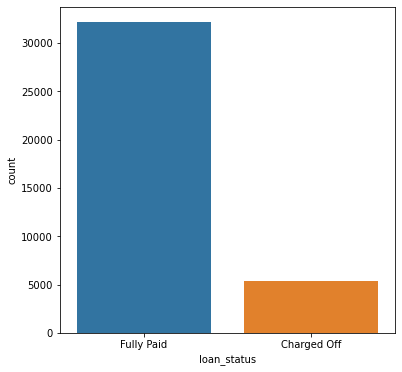

Fully Paid     32145
Charged Off     5399
Name: loan_status, dtype: int64


In [344]:
plt.figure(figsize=(6, 6))
sns.countplot(x = loanDf["loan_status"])
plt.show()
print(loanDf.loan_status.value_counts())

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Majority of the loans are Fully Paid. The charged off loan percenatge is ~15% </p>

### grade plotting

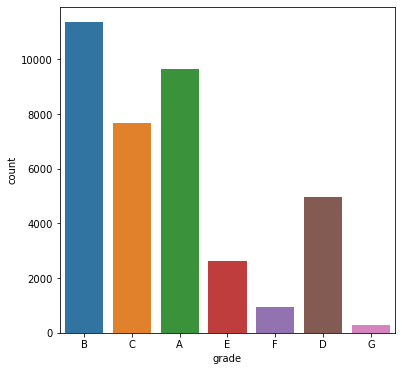

In [345]:
plt.figure(figsize=(6, 6))
sns.countplot(x='grade', data=loanDf)
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Majority of the loans are A, B and C graded </p>

### sub_grade plotting

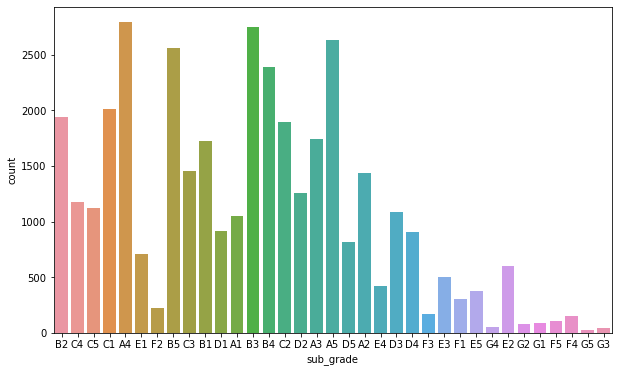

In [346]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sub_grade', data=loanDf)
plt.show()

### annual_inc plotting

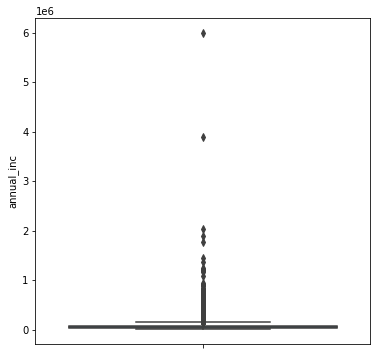

count    3.754400e+04
mean     6.940708e+04
std      6.467698e+04
min      4.000000e+03
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


In [347]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=loanDf.annual_inc)
plt.show()
print(loanDf['annual_inc'].describe())

### Removing outliers from annual_inc

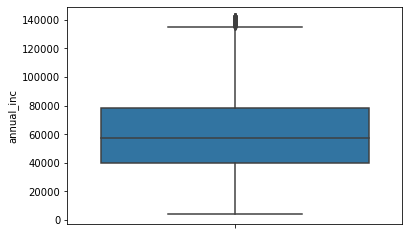

count     35675.000000
mean      61458.271977
std       27774.492578
min        4000.000000
25%       40000.000000
50%       57000.000000
75%       78000.000000
max      142000.000000
Name: annual_inc, dtype: float64


In [348]:
annual_income = loanDf['annual_inc'].quantile(0.95)
loanDf = loanDf[loanDf.annual_inc <= annual_income]
sns.boxplot(y=loanDf.annual_inc)
plt.show()

print(loanDf['annual_inc'].describe())

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: The annual income of most of the loan applicants is in the range of 40,000 to 80,000 </p>

### emp_length plotting

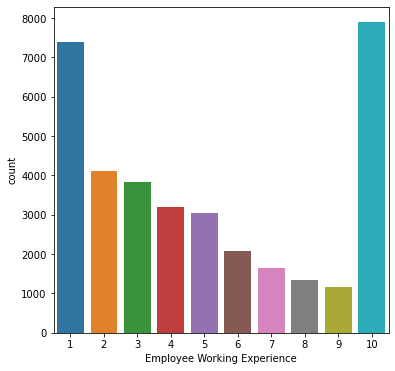

In [349]:
plt.figure(figsize=(6, 6))
sns.countplot(x='emp_length', data=loanDf)
plt.xlabel('Employee Working Experience')
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: People with 10 and above years of work experience applied for most of the loans. People with 0-1 years experience are the second most category of people applied for loans. </p>

### funded_amnt plotting

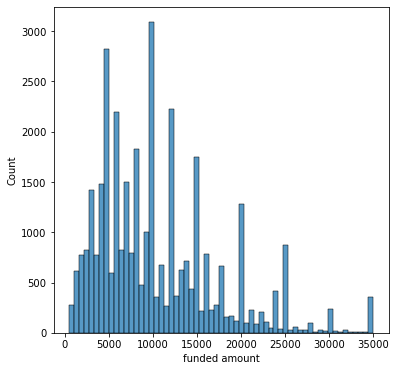

In [350]:
plt.figure(figsize=(6, 6))
sns.histplot(x=loanDf['funded_amnt'])
plt.xlabel('funded amount')
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Majority of the loans funded are within 15k </p>

### purpose plotting

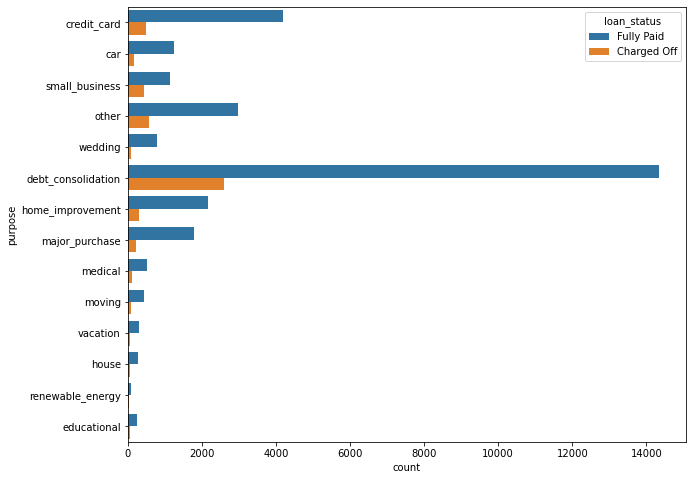

In [351]:
plt.figure(figsize=(10, 8))
sns.countplot(y="purpose", hue='loan_status', data=loanDf)
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Majority of the loans applied for Debt Consolidation purpose </p>

### home_ownership plotting

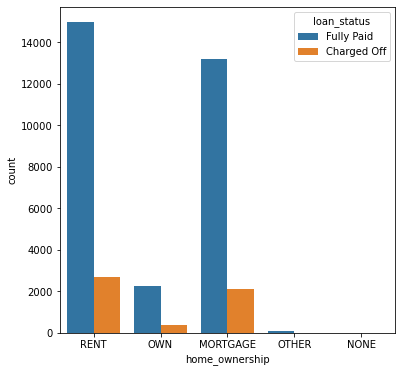

In [352]:
plt.figure(figsize=(6, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=loanDf)
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Majority of the loan applicants are living in Rented or Mortgaged homes </p>

### int_rate plotting

count    35675.000000
mean        11.919305
std          3.658499
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64


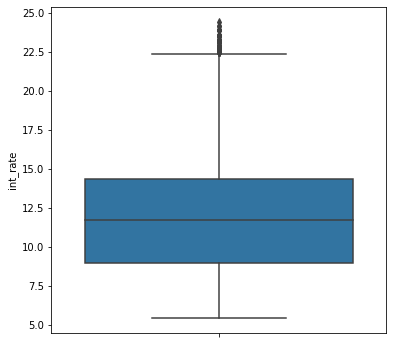

In [353]:
plt.figure(figsize=(6, 6))
sns.boxplot(y=loanDf.int_rate)
print(loanDf['int_rate'].describe())

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Average Interest rate is around 12% </p>

### Checking installment ratio with respect to income

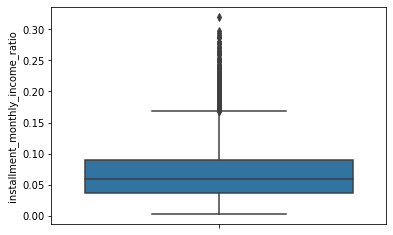

count    35675.000000
mean         0.067046
std          0.039967
min          0.002167
25%          0.036576
50%          0.059425
75%          0.089685
max          0.320262
Name: installment_monthly_income_ratio, dtype: float64


In [525]:
loanDf['monthly_income'] = loanDf['annual_inc']/12
loanDf['installment_monthly_income_ratio'] = loanDf['installment']/loanDf['monthly_income']
sns.boxplot(y=loanDf.installment_monthly_income_ratio)
plt.show()
print(loanDf['installment_monthly_income_ratio'].describe())

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Max installment amount defined is around 32% of monthly income  </p>

### Plotting loan_status and term

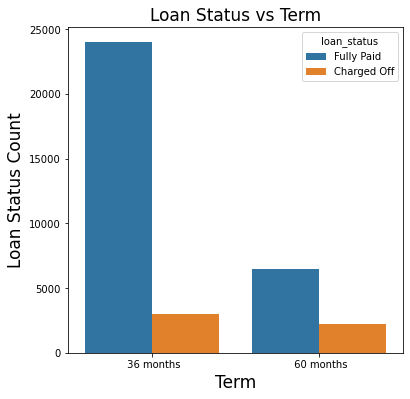

In [354]:
plt.figure(figsize=(6, 6))
plot = sns.countplot(x="term", data=loanDf, hue='loan_status')

plot.set_title("Loan Status vs Term", fontsize=17)
plot.set_xlabel("Term", fontsize=17)
plot.set_ylabel("Loan Status Count", fontsize=17)

plt.show()

## Segmented Univariate analysis

### Plotting Annual Income vs Charged Off Ratio

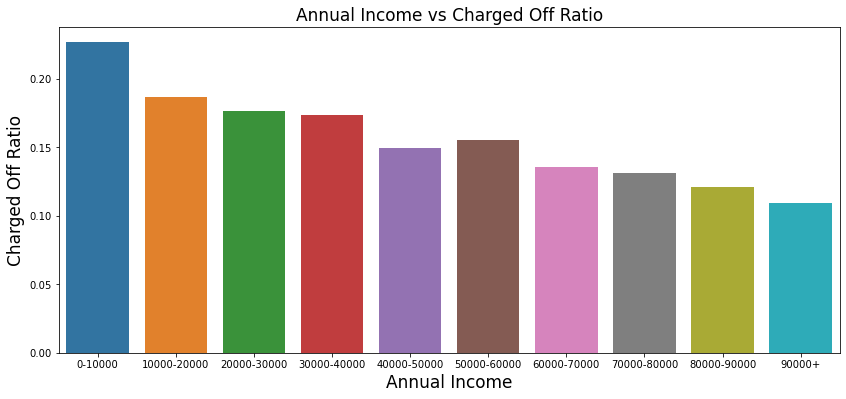

In [534]:
loanDf['annual_income_bins'] = pd.cut(loanDf['annual_inc'], [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 1000000], labels=['0-10000', '10000-20000', '20000-30000', '30000-40000', '40000-50000', '50000-60000', '60000-70000', '70000-80000', '80000-90000', '90000+'])

# Data in terms of percentages
annual_income = loanDf.groupby(['annual_income_bins']).loan_status.value_counts().unstack().reset_index()
annual_income['total_count'] = annual_income['Charged Off'] + annual_income['Fully Paid']
annual_income['charged_off_ratio'] = annual_income['Charged Off'] / annual_income['total_count']

plt.figure(figsize=(14,6))
plot = sns.barplot(x='annual_income_bins', y='charged_off_ratio', data=annual_income)
plot.set_title("Annual Income vs Charged Off Ratio", fontsize=17)
plot.set_xlabel("Annual Income", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: People who are in the lower income range has a high chances of defaulting the loan when compared with people with higher income range </p>

### Plotting Term vs Charged Off Ratio

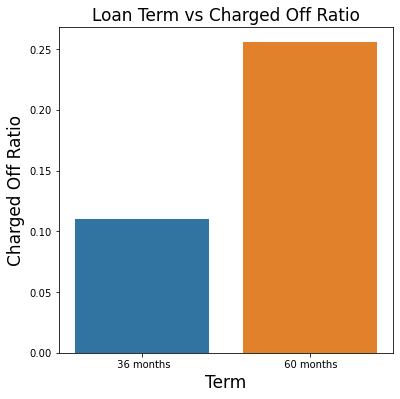

In [496]:
# Let's see how term affects the defaulting 
employment_term_df = loanDf.groupby(['term']).loan_status.value_counts().unstack().reset_index()

employment_term_df['total_count'] = employment_term_df['Charged Off'] + employment_term_df['Fully Paid']
employment_term_df['charged_off_ratio'] = employment_term_df['Charged Off'] / employment_term_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='term', y='charged_off_ratio', data=employment_term_df)
plot.set_title("Loan Term vs Charged Off Ratio", fontsize=17)
plot.set_xlabel("Term", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: People who take loan for 60 months have a higher chance of defaulting the loan </p>

### Plotting Employement Length vs Charged Off Ratio

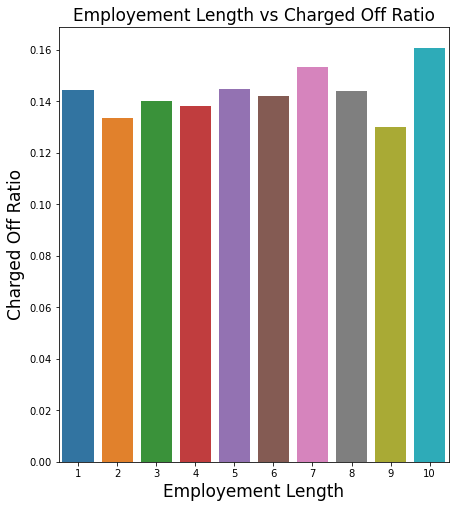

In [536]:
# Let's see how employment length affects the defaulting 
employment_ln_df = loanDf.groupby(['emp_length']).loan_status.value_counts().unstack().reset_index()

employment_ln_df['total_count'] = employment_ln_df['Charged Off'] + employment_ln_df['Fully Paid']
employment_ln_df['charged_off_ratio'] = employment_ln_df['Charged Off'] / employment_ln_df['total_count']

plt.figure(figsize=(7, 8))
plot = sns.barplot(x='emp_length', y='charged_off_ratio', data=employment_ln_df)
plot.set_title("Employement Length vs Charged Off Ratio", fontsize=17)
plot.set_xlabel("Employement Length", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Years of experience not impacting charged off scenario </p>

### Plotting Loan Purpose vs Charged Off Ratio

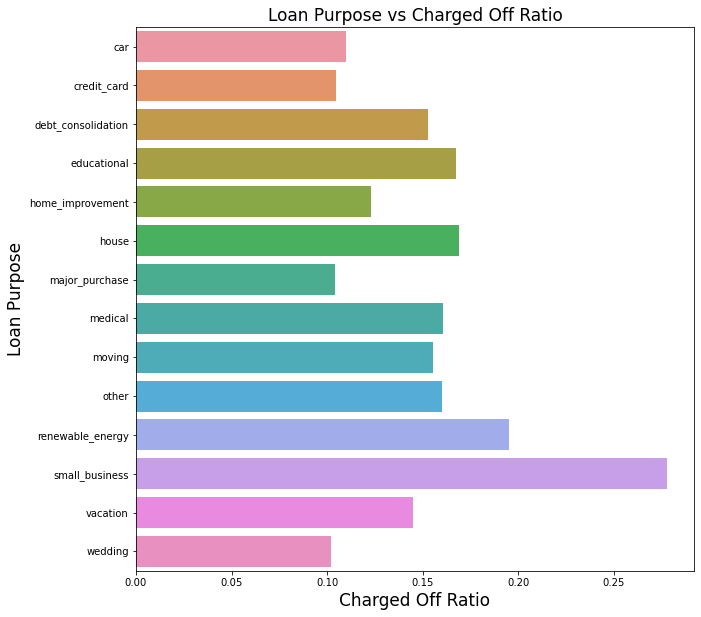

In [499]:
# Let's understand how purpose affects.
purpose_loan_df = loanDf.groupby(['purpose']).loan_status.value_counts().unstack().reset_index()

purpose_loan_df['total_count'] = purpose_loan_df['Charged Off'] + purpose_loan_df['Fully Paid']
purpose_loan_df['charged_off_ratio'] = purpose_loan_df['Charged Off'] / purpose_loan_df['total_count']
plt.figure(figsize=(10, 10))
plot = sns.barplot(x='charged_off_ratio', y='purpose', data=purpose_loan_df)
plot.set_title("Loan Purpose vs Charged Off Ratio", fontsize=17)
plot.set_ylabel("Loan Purpose", fontsize=17)
plot.set_xlabel("Charged Off Ratio", fontsize=17)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: People availing loan for Small Buisnesses has high chances of defaulting it </p>

### Plotting Interest Rates vs Charged Off Ratio

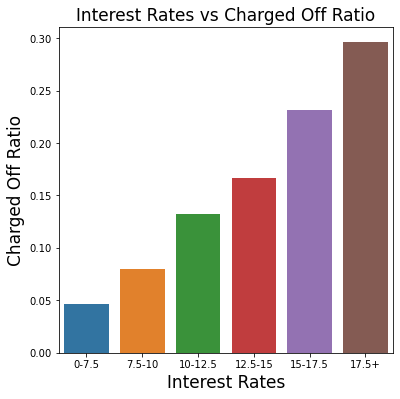

In [500]:
# Let's see interest rates
loanDf['int_rate_bins'] = pd.cut(loanDf['int_rate'], [0, 7.5, 10, 12.5, 15, 17.5, 20], labels=['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15-17.5', '17.5+'])

interest_loan_df = loanDf.groupby(['int_rate_bins']).loan_status.value_counts().unstack().reset_index()

interest_loan_df['total_count'] = interest_loan_df['Charged Off'] + interest_loan_df['Fully Paid']
interest_loan_df['charged_off_ratio'] = interest_loan_df['Charged Off'] / interest_loan_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='int_rate_bins', y='charged_off_ratio', data=interest_loan_df)
plot.set_title("Interest Rates vs Charged Off Ratio", fontsize=17)
plot.set_xlabel("Interest Rates", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Loans given for high interest rate have a high chance of being charged off </p>

### Plotting Grade vs Charged Off Ratio

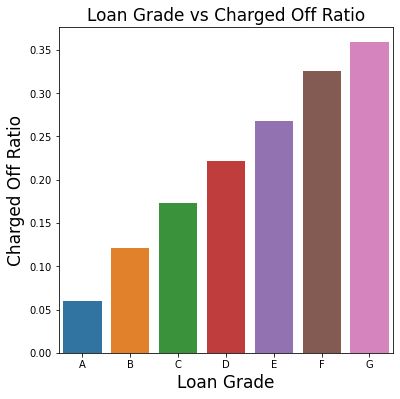

In [535]:
grade_loan_df = loanDf.groupby(['grade']).loan_status.value_counts().unstack().reset_index()

grade_loan_df['total_count'] = grade_loan_df['Charged Off'] + grade_loan_df['Fully Paid']
grade_loan_df['charged_off_ratio'] = grade_loan_df['Charged Off'] / grade_loan_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='grade', y='charged_off_ratio', data=grade_loan_df)
plot.set_title("Loan Grade vs Charged Off Ratio", fontsize=17)
plot.set_xlabel("Loan Grade", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Charged off scenarios are high for G, F and E categories </p>

### Plotting Public Bankruptcy vs Charged Off Ratio

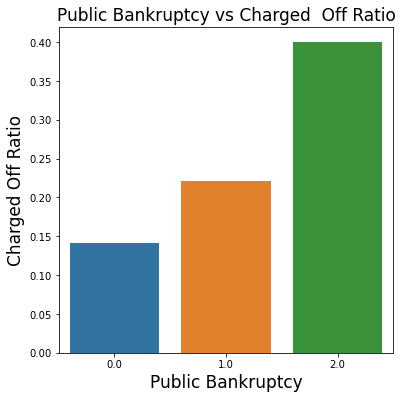

In [502]:
# public bankruptcy
public_bankruptcy_loan_df = loanDf.groupby(['pub_rec_bankruptcies']).loan_status.value_counts().unstack().reset_index()

public_bankruptcy_loan_df['total_count'] = public_bankruptcy_loan_df['Charged Off'] + public_bankruptcy_loan_df['Fully Paid']
public_bankruptcy_loan_df['charged_off_ratio'] = public_bankruptcy_loan_df['Charged Off'] / public_bankruptcy_loan_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='pub_rec_bankruptcies', y='charged_off_ratio', data=public_bankruptcy_loan_df)
plot.set_title("Public Bankruptcy vs Charged  Off Ratio", fontsize=17)
plot.set_xlabel("Public Bankruptcy", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)
                
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Charged off scenarios are increasing with number of public recorded bankruptcies </p>

### Plotting Verification Status vs Loan Status

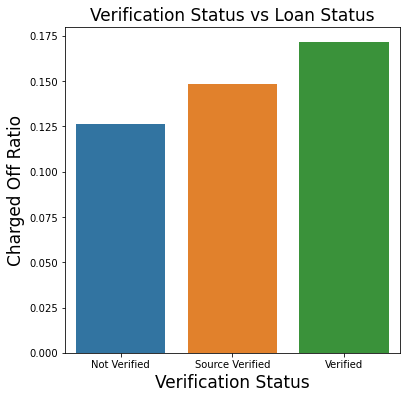

In [503]:
# verification status
verification_status_loan_df = loanDf.groupby(['verification_status']).loan_status.value_counts().unstack().reset_index()

verification_status_loan_df['total_count'] = verification_status_loan_df['Charged Off'] + verification_status_loan_df['Fully Paid']
verification_status_loan_df['charged_off_ratio'] = verification_status_loan_df['Charged Off'] / verification_status_loan_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='verification_status', y='charged_off_ratio', data=verification_status_loan_df)
plot.set_title("Verification Status vs Loan Status", fontsize=17)
plot.set_xlabel("Verification Status", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Verification status not impacting charged off scenarios </p>

### Plotting DTI vs Charged Off Ratio

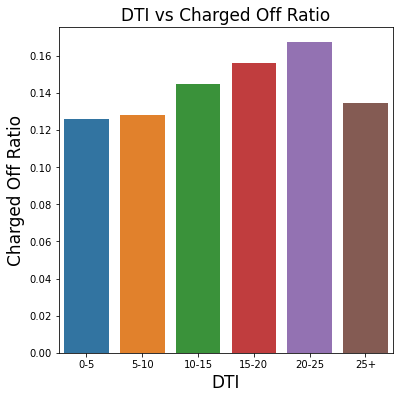

In [504]:
# Let's check dti
loanDf['dti_rate_bins'] = pd.cut(loanDf['dti'], [0, 5, 10, 15, 20, 25, 30], labels=['0-5', '5-10', '10-15', '15-20', '20-25', '25+'])

dti_loan_df = loanDf.groupby(['dti_rate_bins']).loan_status.value_counts().unstack().reset_index()

dti_loan_df['total_count'] = dti_loan_df['Charged Off'] + dti_loan_df['Fully Paid']
dti_loan_df['charged_off_ratio'] = dti_loan_df['Charged Off'] / dti_loan_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='dti_rate_bins', y='charged_off_ratio', data=dti_loan_df)
plot.set_title("DTI vs Charged Off Ratio", fontsize=17)
plot.set_xlabel("DTI", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: DTI not impacting Charged off ratio </p>

### Plotting Delinquency in last 2 years vs Charged Off Ratio

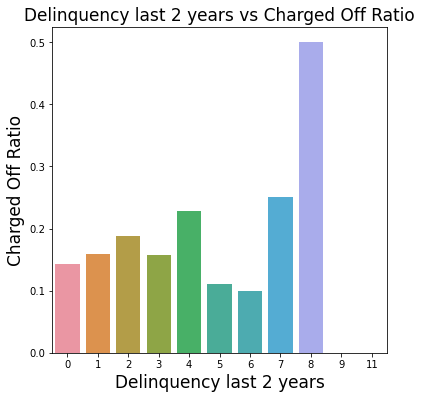

In [505]:
# Let's check delinq past 2 years
delinq_2yrs_loan_df = loanDf.groupby(['delinq_2yrs']).loan_status.value_counts().unstack().reset_index()

delinq_2yrs_loan_df['total_count'] = delinq_2yrs_loan_df['Charged Off'] + delinq_2yrs_loan_df['Fully Paid']
delinq_2yrs_loan_df['charged_off_ratio'] = delinq_2yrs_loan_df['Charged Off'] / delinq_2yrs_loan_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='delinq_2yrs', y='charged_off_ratio', data=delinq_2yrs_loan_df)
plot.set_title("Delinquency last 2 years vs Charged Off Ratio", fontsize=17)
plot.set_xlabel("Delinquency last 2 years", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)

plt.show()

### Plotting Loan amount vs Charged off Ratio

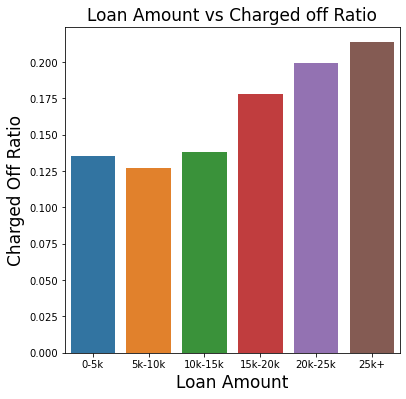

In [537]:
# Let's check loan amount impact
loanDf['loan_amnt_bins'] = pd.cut(loanDf['loan_amnt'], [0, 5000, 10000, 15000, 20000, 25000, 30000], labels=['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k+'])

loan_amount_df = loanDf.groupby(['loan_amnt_bins']).loan_status.value_counts().unstack().reset_index()

loan_amount_df['total_count'] = loan_amount_df['Charged Off'] + loan_amount_df['Fully Paid']
loan_amount_df['charged_off_ratio'] = loan_amount_df['Charged Off'] / loan_amount_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='loan_amnt_bins', y='charged_off_ratio', data=loan_amount_df)
plot.set_title("Loan Amount vs Charged off Ratio", fontsize=17)
plot.set_xlabel("Loan Amount", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Charged off scenarios are in increasing with the increase in loan amount </p

### Plotting Loan Issued Month vs Charged off Ratio

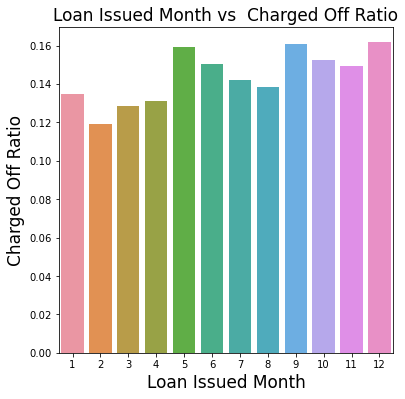

In [507]:
# Issued month
issued_month_loan_df = loanDf.groupby(['issue_d_month']).loan_status.value_counts().unstack().reset_index()

issued_month_loan_df['total_count'] = issued_month_loan_df['Charged Off'] + issued_month_loan_df['Fully Paid']
issued_month_loan_df['charged_off_ratio'] = issued_month_loan_df['Charged Off'] / issued_month_loan_df['total_count']

plt.figure(figsize=(6, 6))
plot = sns.barplot(x='issue_d_month', y='charged_off_ratio', data=issued_month_loan_df)
plot.set_title("Loan Issued Month vs  Charged Off Ratio", fontsize=17)
plot.set_xlabel("Loan Issued Month", fontsize=17)
plot.set_ylabel("Charged Off Ratio", fontsize=17)
                
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Loan issued month not impacting charged off scenarios </p>

## Bi-variate analyis

### Plotting Loan Amount vs Purpose of Loan

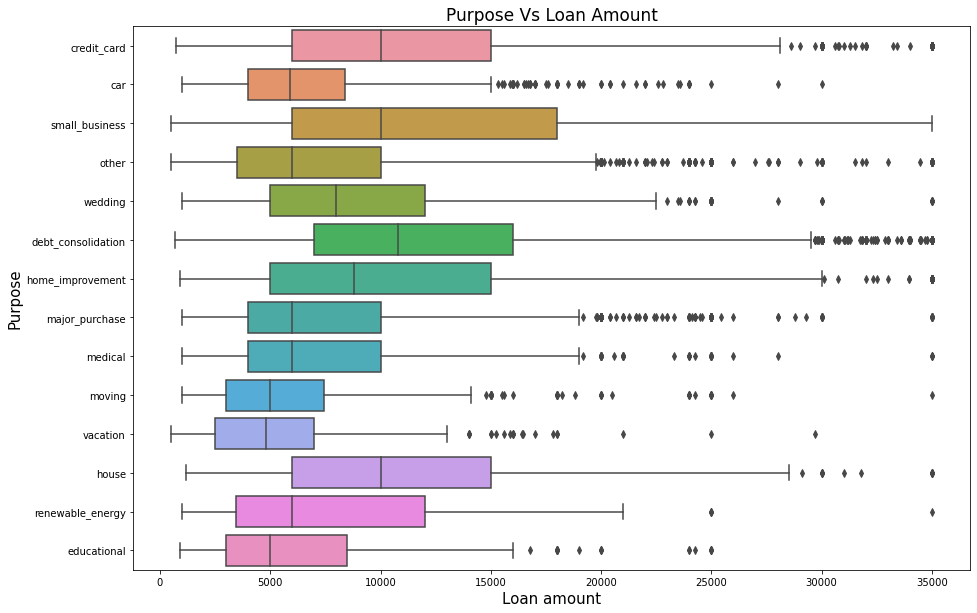

In [371]:
plt.figure(figsize=[15,10])
plot = sns.boxplot(loanDf['loan_amnt'], loanDf['purpose'])

plot.set_title("Purpose Vs Loan Amount", fontsize=17)
plot.set_ylabel("Purpose", fontsize=15)
plot.set_xlabel("Loan amount", fontsize=15)
plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Highest loan amount was taken for small_business followed by debit_consolidation </p>

### Plotting Term vs Interest Rate

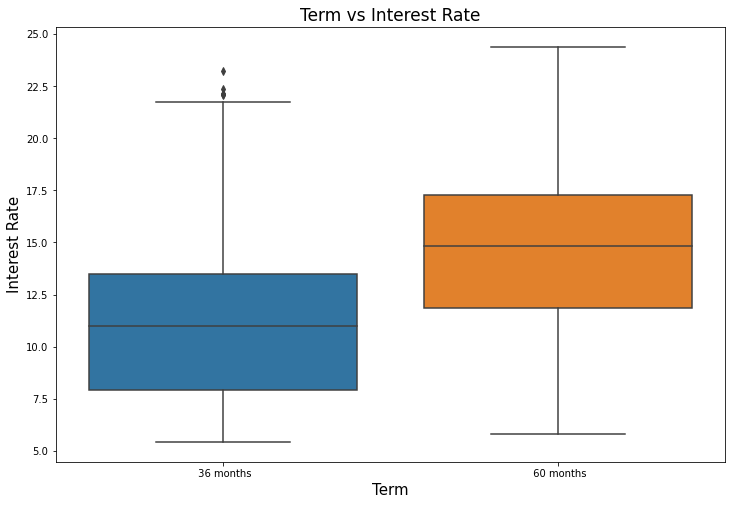

In [377]:
plt.figure(figsize=[12,8])
plot = sns.boxplot(loanDf['term'], loanDf['int_rate'])

plot.set_title("Term vs Interest Rate", fontsize=17)
plot.set_ylabel("Interest Rate", fontsize=15)
plot.set_xlabel("Term", fontsize=15)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Loan taken for 60 months has higher interest rate </p>

### Plotting Grade vs Interest Rate

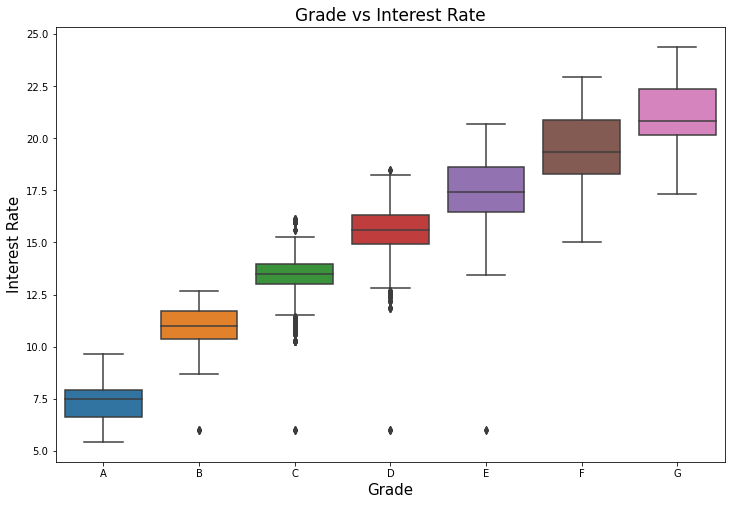

In [378]:
plt.figure(figsize=[12,8])
plot = sns.boxplot(loanDf['grade'].sort_values(ascending=True), loanDf['int_rate'])

plot.set_title("Grade vs Interest Rate", fontsize=17)
plot.set_ylabel("Interest Rate", fontsize=15)
plot.set_xlabel("Grade", fontsize=15)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Interest rate is in increasing order for grades A to G </p>

### Plotting Loan Amount vs Interest Rate

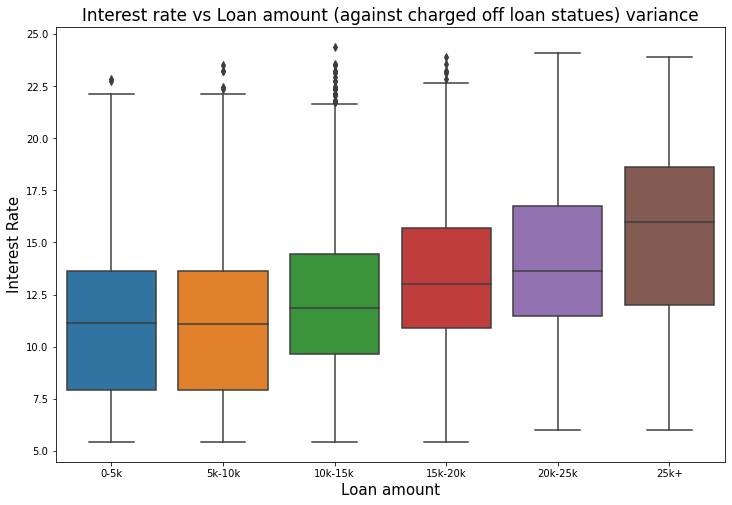

In [380]:
plt.figure(figsize=[12,8])
plot = sns.boxplot(loanDf['loan_amnt_bins'], loanDf['int_rate'])

plot.set_title("Interest rate vs Loan amount (against charged off loan statues) variance", fontsize=17)
plot.set_ylabel("Interest Rate", fontsize=15)
plot.set_xlabel("Loan amount", fontsize=15)

plt.show()

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Observation: Interest rate increase with increase in loan amount </p>

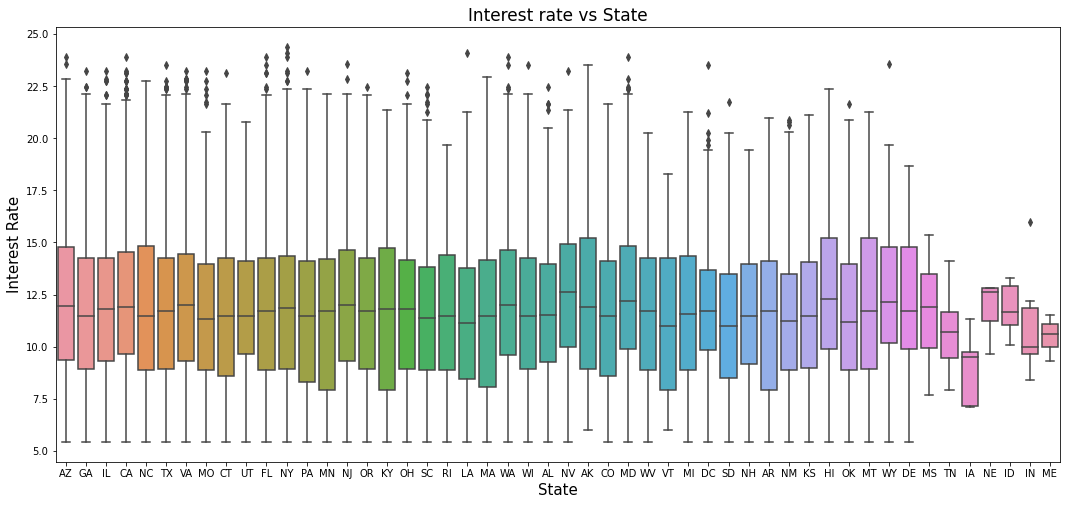

In [533]:
plt.figure(figsize=[18,8])
plot = sns.boxplot(loanDf['addr_state'], loanDf['int_rate'])

plot.set_title("Interest rate vs State", fontsize=17)
plot.set_ylabel("Interest Rate", fontsize=15)
plot.set_xlabel("State", fontsize=15)

plt.show()

### Plotting Interest Rate vs Term vs Charged Off Rato

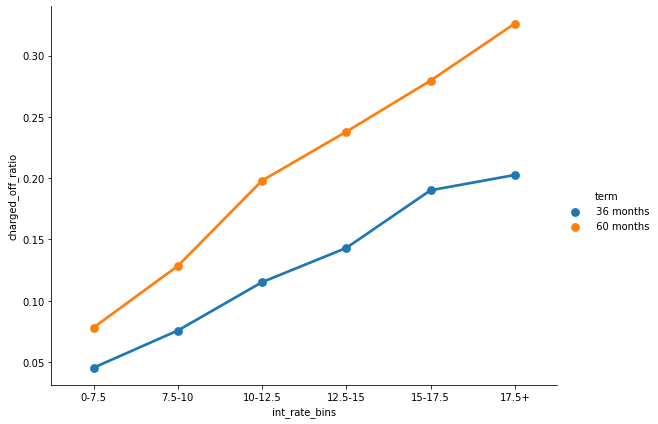

In [509]:
term_interest_loan_df = loanDf.groupby(['int_rate_bins', 'term']).loan_status.value_counts().unstack().reset_index()
term_interest_loan_df['total_count'] = term_interest_loan_df['Charged Off'] + term_interest_loan_df['Fully Paid']
term_interest_loan_df['charged_off_ratio'] = term_interest_loan_df['Charged Off'] / term_interest_loan_df['total_count']

sns.catplot(x="int_rate_bins", y="charged_off_ratio", hue="term", kind="point", data=term_interest_loan_df, height=6, aspect=8/6)

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Charged off ratio increasing with increase in interest rates for both 36 and 60 terms </p>

### Plotting Term vs Loan Amount Vs Charged Off Ratio

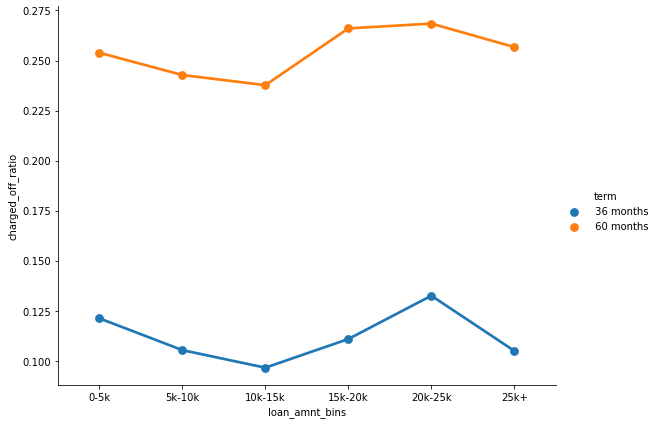

In [511]:
term_loan_amount_df = loanDf.groupby(['term','loan_amnt_bins']).loan_status.value_counts().unstack().reset_index()
term_loan_amount_df['total_count'] = term_loan_amount_df['Charged Off'] + term_loan_amount_df['Fully Paid']
term_loan_amount_df['charged_off_ratio'] = term_loan_amount_df['Charged Off'] / term_loan_amount_df['total_count']

sns.catplot(x="loan_amnt_bins", y="charged_off_ratio", hue="term", kind="point", data=term_loan_amount_df, height=6, aspect=8/6)

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Slight variation observed in charged off ratio with respect to increase in loan amount, high variation observed with respect to term vs charged off ratio </p>

### Plotting Interest Rate vs Loan Amount vs Charged Off Ratio

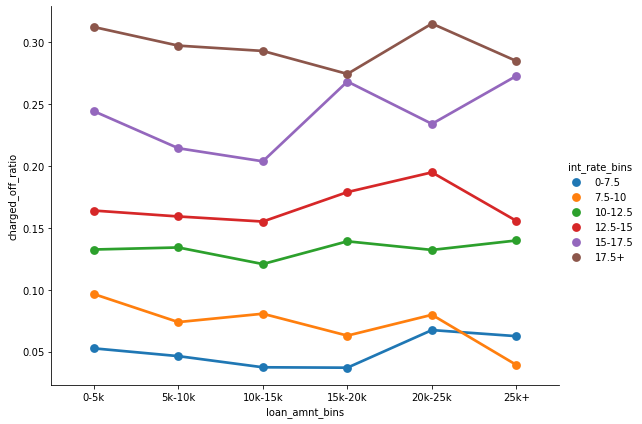

In [512]:
interest_loan_amount_df = loanDf.groupby(['int_rate_bins','loan_amnt_bins']).loan_status.value_counts().unstack().reset_index()
interest_loan_amount_df['total_count'] = interest_loan_amount_df['Charged Off'] + interest_loan_amount_df['Fully Paid']
interest_loan_amount_df['charged_off_ratio'] = interest_loan_amount_df['Charged Off'] / interest_loan_amount_df['total_count']

sns.catplot(x="loan_amnt_bins", y="charged_off_ratio", hue="int_rate_bins", kind="point", data=interest_loan_amount_df, height=6, aspect=8/6)

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Slight variation observed in charged off ratio with respect to increase in loan amount, high variation observed with respect to interest rate vs charged off ratio </p>

### Plotting Grade vs Loan Amount vs Charged Off Ratio

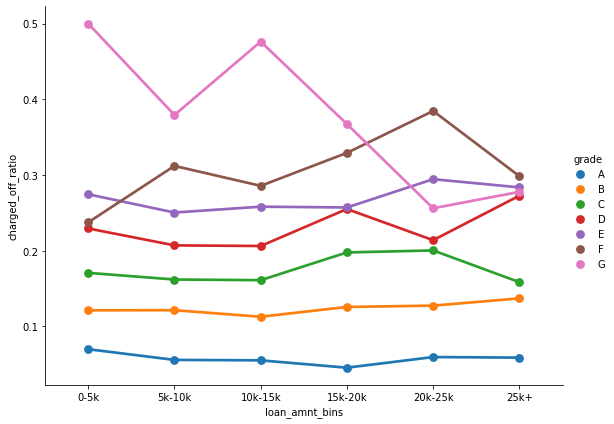

In [513]:
grade_loan_amount_df = loanDf.groupby(['grade','loan_amnt_bins']).loan_status.value_counts().unstack().reset_index()
grade_loan_amount_df['total_count'] = grade_loan_amount_df['Charged Off'] + grade_loan_amount_df['Fully Paid']
grade_loan_amount_df['charged_off_ratio'] = grade_loan_amount_df['Charged Off'] / grade_loan_amount_df['total_count']

sns.catplot(x="loan_amnt_bins", y="charged_off_ratio", hue="grade", kind="point", data=grade_loan_amount_df, height=6, aspect=8/6)

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Slight variation observed in charged off ratio with respect to increase in loan amount, high variation observed with respect to grade vs charged off ratio </p>

### Plotting Grade vs Term vs Charged Off Ratio

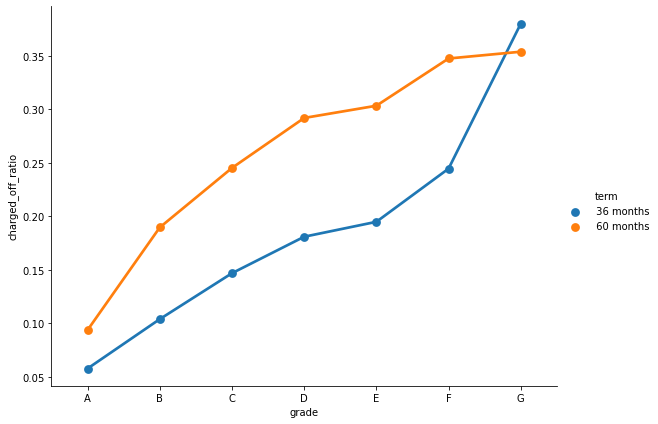

In [514]:
grade_term_df = loanDf.groupby(['grade','term']).loan_status.value_counts().unstack().reset_index()
grade_term_df['total_count'] = grade_term_df['Charged Off'] + grade_term_df['Fully Paid']
grade_term_df['charged_off_ratio'] = grade_term_df['Charged Off'] / grade_term_df['total_count']

sns.catplot(x="grade", y="charged_off_ratio", hue="term", kind="point", data=grade_term_df, height=6, aspect=8/6)

<p style="font-family: Arial; font-size:1.4em;color:blue;"> Charged off ratio increasing for increase in term and for grades A to G </p>

## Multivariate Analysis

### Corelation Matrix of all available columns

<AxesSubplot:>

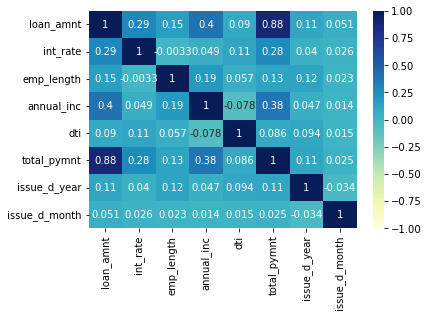

In [532]:
columns_shortlisted= ["loan_amnt", "int_rate", "emp_length", "annual_inc", "dti", "total_pymnt", "issue_d_year", "issue_d_month"]
sns.heatmap(loanDf[columns_shortlisted].corr(),vmin=-1.0,vmax=1.0,annot=True, cmap="YlGnBu")

# Observations:

Summary for the provided data:

    - ~15% of the loans are currently defaulted   
    - Highest number of loans approved are for Debt Consolidation category
    - Majority of the people who are taking loans and defaulting are living in rented and mortgaged homes
    - Average interest rate is around 12%
    - People with 10+ years of work experince applied for most of the loans. And people with 0-1 years experience are the second most category of people applied for loans.
    - Majority of the loans are A, B and C graded
    - Majority of the loans funded are within 15k
    - Highest loan amount was taken for small_business followed by debit_consolidation
    - Loan taken for 60 months has higher interest rate
    - Interest rate is in increasing order for grades A to G
    - Interest rate increasing with increase in loan amount
    - Max installment amount defined is around 32% of monthly income

Possible Driving Factors for loan default

    - High Interest rate loans
    - G, F and E graded loans
    - Loans applied for 60 months term
    - People who are in the lower income range
    - Higher loan amount requests
    - Loans for Small Businesses
    - People who have defaulted before